## Análise descritiva dos dados de qualidade do ar dos Estados Unidos

* Utilização de dataframes públicos dos anos de 2019 e 2023, com informações de registros da presença de poluentes (ozônio, monóxido de carbono, dióxido de enxofre e dióxido de nitrogênio) no ar nos Estados Unidos, disponível no link: https://aqs.epa.gov/aqsweb/airdata/download_files.html


* Para essa análise foi acessada a opção <strong>Tables of Daily and Daily Summary Data </strong> e utilizada as informações dos anos de 2019 e 2023.


* Para melhor entendimento dos campos do dataframe, foi consultada a documentação através do link https://aqs.epa.gov/aqsweb/airdata/FileFormats.html e tendo como base o item 5 (Daily Summary Files).


* Para classificação dos valores de qualidade do ar, está sendo utilizado como base as informações do seguinte link: https://www.airnow.gov/aqi/aqi-basics/

#### Importando as bibliotecas pandas, numpy, seaborn, matplot e scipy.stats

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kstest

#### Configuração para que todas as colunas do dataframe sejam exibidas

In [8]:
pd.set_option('display.max_columns', None)

#### Leitura das bases de dados

In [9]:
# 2019
ozone_2019 = pd.read_csv(r'C:\Users\je_gr\Documents\Unisinos\2.Introdução a Python\Mod4\daily_44201_2019.csv')
co_2019 = pd.read_csv(r'C:\Users\je_gr\Documents\Unisinos\2.Introdução a Python\Mod4\daily_42101_2019.csv')
so2_2019 = pd.read_csv(r'C:\Users\je_gr\Documents\Unisinos\2.Introdução a Python\Mod4\daily_42401_2019.csv')
no2_2019 = pd.read_csv(r'C:\Users\je_gr\Documents\Unisinos\2.Introdução a Python\Mod4\daily_42602_2019.csv')

# 2023
ozone_2023 = pd.read_csv(r'C:\Users\je_gr\Documents\Unisinos\2.Introdução a Python\Mod4\daily_44201_2023.csv')
co_2023 = pd.read_csv(r'C:\Users\je_gr\Documents\Unisinos\2.Introdução a Python\Mod4\daily_42101_2023.csv')
so2_2023 = pd.read_csv(r'C:\Users\je_gr\Documents\Unisinos\2.Introdução a Python\Mod4\daily_42401_2023.csv')
no2_2023 = pd.read_csv(r'C:\Users\je_gr\Documents\Unisinos\2.Introdução a Python\Mod4\daily_42602_2023.csv')

## Tratamento dos dataframes de 2019 e 2023 referente aos poluentes:
* ozônio
* monóxido de carbono
* dióxido de enxofre
* dióxido de nitrogênio

### OZÔNIO (O3)

* Eliminando linhas que não contenham um valor de AQI (Air Quality Index) </br>
* Adicionando colunas Year e Month </br>
* Adicionando coluna 1st Max Value AQI

In [12]:
# 2019
ozone_2019 = ozone_2019.loc[ozone_2019['AQI']>=0]
ozone_2019['Date Local'] = pd.to_datetime(ozone_2019['Date Local'], format='%Y/%m/%d')
ozone_2019['Year'] = ozone_2019['Date Local'].dt.year
ozone_2019['Month'] = ozone_2019['Date Local'].dt.month
ozone_2019['Month'] = pd.cut(ozone_2019['Month'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                             labels=['Jan','Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

# transformando os valores da coluna "1st Max Value" para inteiro e mantendo o mesmo padrão da coluan AQI
ozone_2019['1st Max Value AQI'] = round((ozone_2019['1st Max Value'] * 1000), 0)
ozone_2019['1st Max Value AQI'] = ozone_2019['1st Max Value AQI'].astype(int)

# 2023
ozone_2023 = ozone_2023.loc[ozone_2023['AQI']>=0]
ozone_2023['Date Local'] = pd.to_datetime(ozone_2023['Date Local'], format='%Y/%m/%d')
ozone_2023['Year'] = ozone_2023['Date Local'].dt.year
ozone_2023['Month'] = ozone_2023['Date Local'].dt.month
ozone_2023['Month'] = pd.cut(ozone_2023['Month'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                             labels=['Jan','Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

# transformando os valores da Arithmetic Mean AQI para inteiro e mantendo o mesmo padrão da coluan AQI
ozone_2023['1st Max Value AQI'] = round((ozone_2023['1st Max Value'] * 1000), 0)
ozone_2023['1st Max Value AQI'] = ozone_2023['1st Max Value AQI'].astype(int)

### MONÓXIDO DE CARBONO (CO)

* Adicionando colunas Year e Month </br>
* Adicionando coluna 1st Max Value AQI

In [13]:
# 2019
co_2019['Date Local'] = pd.to_datetime(co_2019['Date Local'], format='%Y/%m/%d')
co_2019['Year'] = co_2019['Date Local'].dt.year
co_2019['Month'] = co_2019['Date Local'].dt.month
co_2019['Month'] = pd.cut(co_2019['Month'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                             labels=['Jan','Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

# transformando os valores da coluna "1st Max Value" para inteiro e mantendo o mesmo padrão da coluan AQI
co_2019['1st Max Value AQI'] = round((co_2019['1st Max Value'] * 1000), 0)
co_2019['1st Max Value AQI'] = co_2019['1st Max Value AQI'].astype(int)

# 2023
co_2023['Date Local'] = pd.to_datetime(co_2023['Date Local'], format='%Y/%m/%d')
co_2023['Year'] = co_2023['Date Local'].dt.year
co_2023['Month'] = co_2023['Date Local'].dt.month
co_2023['Month'] = pd.cut(co_2023['Month'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                             labels=['Jan','Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

# transformando os valores da coluna "1st Max Value" para inteiro e mantendo o mesmo padrão da coluan AQI
co_2023['1st Max Value AQI'] = round((co_2023['1st Max Value'] * 1000), 0)
co_2023['1st Max Value AQI'] = co_2023['1st Max Value AQI'].astype(int)

### DIÓXIDO DE ENXOFRE (SO2)

* Eliminando linhas que não contenham um valor de AQI (Air Quality Index) </br>
* Adicionando colunas Year e Month

In [14]:
# 2019
so2_2019 = so2_2019.loc[so2_2019['AQI']>=0]
so2_2019['Date Local'] = pd.to_datetime(so2_2019['Date Local'], format='%Y/%m/%d')
so2_2019['Year'] = so2_2019['Date Local'].dt.year
so2_2019['Month'] = so2_2019['Date Local'].dt.month
so2_2019['Month'] = pd.cut(so2_2019['Month'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                             labels=['Jan','Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

# 2023
so2_2023 = so2_2023.loc[so2_2023['AQI']>=0]
so2_2023['Date Local'] = pd.to_datetime(so2_2023['Date Local'], format='%Y/%m/%d')
so2_2023['Year'] = so2_2023['Date Local'].dt.year
so2_2023['Month'] = so2_2023['Date Local'].dt.month
so2_2023['Month'] = pd.cut(so2_2023['Month'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                             labels=['Jan','Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

### DIÓXIDO DE NITROGÊNIO (NO2)

* Eliminando linhas que não contenham um valor de AQI (Air Quality Index) </br>
* Adicionando colunas Year e Month </br>
* Adicionando Coluna com categoria da qualidade do ar

In [15]:
# 2019
no2_2019 = ozone_2019.loc[ozone_2019['AQI']>=0]
no2_2019['Date Local'] = pd.to_datetime(no2_2019['Date Local'], format='%Y/%m/%d')
no2_2019['Year'] = no2_2019['Date Local'].dt.year
no2_2019['Month'] = no2_2019['Date Local'].dt.month
no2_2019['Month'] = pd.cut(no2_2019['Month'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                             labels=['Jan','Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

# 2023
no2_2023 = no2_2023.loc[no2_2023['AQI']>=0]
no2_2023['Date Local'] = pd.to_datetime(no2_2023['Date Local'], format='%Y/%m/%d')
no2_2023['Year'] = no2_2023['Date Local'].dt.year
no2_2023['Month'] = no2_2023['Date Local'].dt.month
no2_2023['Month'] = pd.cut(no2_2023['Month'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                             labels=['Jan','Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

## <font color='green'> Análises dos dados: </font> Ozônio

#### Medidas descritivas para a coluna AQI (apenas valores válidos) 

In [16]:
# 2019
ozone_2019['AQI'].loc[ozone_2019['AQI']>=0].describe()

count    389890.000000
mean         39.084001
std          15.235792
min           0.000000
25%          31.000000
50%          38.000000
75%          44.000000
max         213.000000
Name: AQI, dtype: float64

In [17]:
# 2023
ozone_2023['AQI'].loc[ozone_2023['AQI']>=0].describe()

count    212222.000000
mean         44.510635
std          18.222568
min           0.000000
25%          34.000000
50%          41.000000
75%          48.000000
max         217.000000
Name: AQI, dtype: float64

#### Checagem se meus dados da coluna AQI tem distribuição normal através do teste Kolmogorov-Smirnov pois tenho mais de 50 valores

In [18]:
# 2019
stat, p_value = kstest(ozone_2019['AQI'], 'norm')

# comparando o valor p com um nível de significância 0,05
if p_value > 0.05:
    print("A distribuição é normal")
else:
    print("A distribuição não é normal")

A distribuição não é normal


#### Histograma para visualizar a distribuição dos dados da coluna AQI no ano de 2019

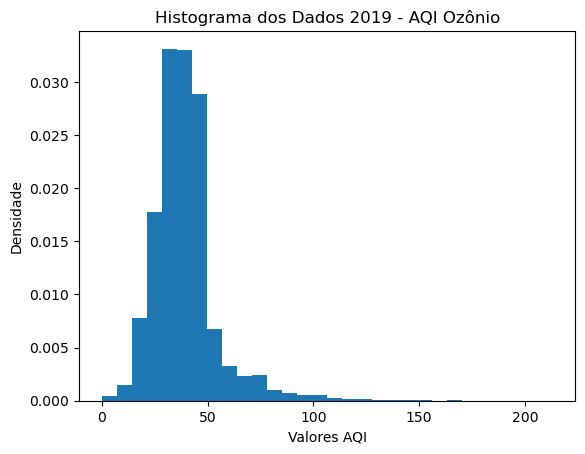

In [19]:
plt.hist(ozone_2019['AQI'], bins=30, density=True)
plt.title('Histograma dos Dados 2019 - AQI Ozônio')
plt.xlabel('Valores AQI')
plt.ylabel('Densidade')
plt.show()

In [20]:
# 2023
stat, p_value = kstest(ozone_2023['AQI'], 'norm')

# comparando o valor p com um nível de significância 0,05
if p_value > 0.05:
    print("A distribuição é normal")
else:
    print("A distribuição não é normal")

A distribuição não é normal


#### Histograma para visualizar a distribuição dos dados da coluna AQI no ano de 2023

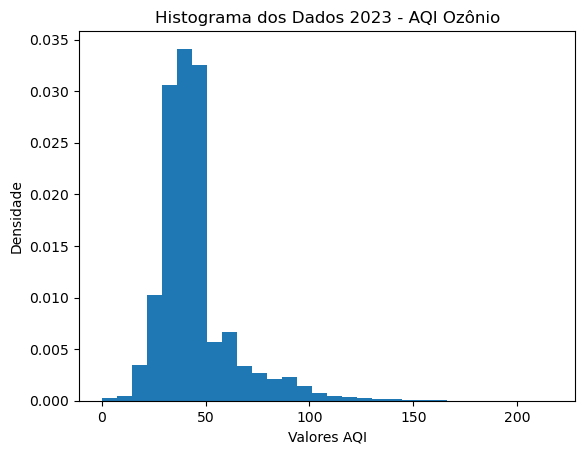

In [21]:
plt.hist(ozone_2023['AQI'], bins=30, density=True)
plt.title('Histograma dos Dados 2023 - AQI Ozônio')
plt.xlabel('Valores AQI')
plt.ylabel('Densidade')
plt.show()

#### <font color='green'> __ANÁLISE__
    - A distribuição dos dados da coluna de AQI dos dataframes do Ozônio de 2019 e 2023 não são distribuições normais. Dessa forma, trabalharemos com a mediana desses dados.

#### Mediana do AQI por estado

In [22]:
# 2019
median2019 = ozone_2019.pivot_table(index='State Name', values='AQI', aggfunc='mean').round(2).reset_index()
# 2023
median2023 = ozone_2023.pivot_table(index='State Name', values='AQI', aggfunc='mean').round(2).reset_index()

# organização do maior valor para o menor
median2019 = median2019.sort_values(by='AQI', ascending=False)
median2023 = median2023.sort_values(by='AQI', ascending=False)

#### Seleção dos 5 estados com as piores medianas de AQI - 2019

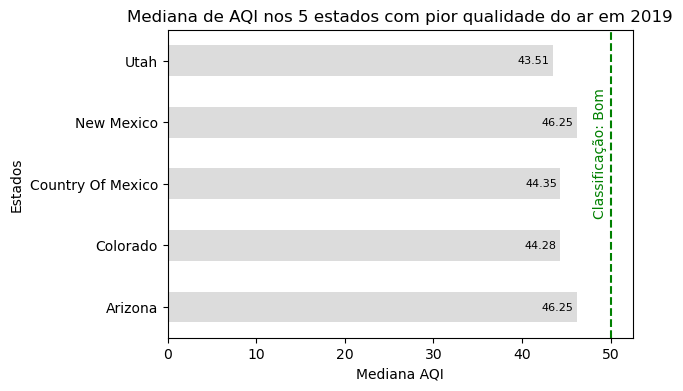

In [23]:
# 2019

# ordenação da coluna State Name por ordem alfabética
median2019_5worst = median2019.head(5).sort_values(by='State Name')

# gráfico
median2019_5worst.plot(kind='barh',figsize=(6, 4),color=(220/255, 220/255, 220/255),legend=None)

# rótulos, títulos e legenda
plt.title('Mediana de AQI nos 5 estados com pior qualidade do ar em 2019',fontsize= 12)
plt.xlabel('Mediana AQI', fontsize= 10)
plt.ylabel('Estados', fontsize= 10)

# adicionando linha de classificação de valores
plt.axvline(x=50, color='g', linestyle='--')
plt.text(48, len(median2019_5worst)/2, f'Classificação: Bom', rotation=90, va='center', color='g')

# adicionando rótulos
for i, valor in enumerate(median2019_5worst['AQI']):
    plt.text(valor -4, i, str(round(valor, 2)), ha='left', va='center', fontsize=8)
    
plt.yticks(np.arange(len(median2019_5worst['State Name'])), median2019_5worst['State Name'])

plt.show()

#### <font color='green'> __ANÁLISE__
    - Todos os estados estão com a mediana de AQI abaixo de 50, classificando esses estados como Bons em relação a qualidade de ar.

#### Seleção dos 5 estados com as piores medianas de AQI - 2023

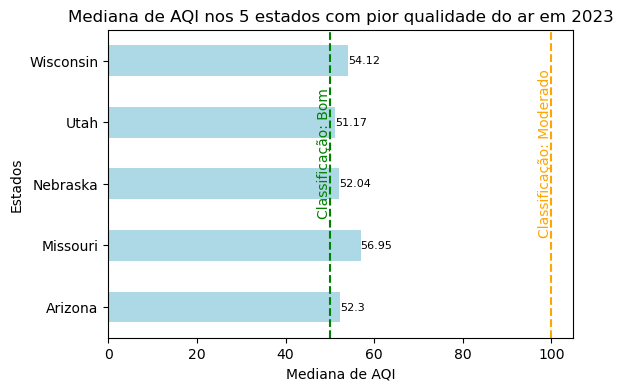

In [24]:
# 2023

# ordenação da coluna State Name por ordem alfabética
median2023_5worst = median2023.head(5).sort_values(by='State Name')

# gráfico
median2023_5worst.plot(kind='barh',figsize=(6, 4),color=(173/255, 216/255, 230/255),legend=None)

# rótulos, títulos e legenda
plt.title('Mediana de AQI nos 5 estados com pior qualidade do ar em 2023',fontsize= 12)
plt.xlabel('Mediana de AQI', fontsize= 10)
plt.ylabel('Estados', fontsize= 10)

# adicionando linhas de classificação de valores
plt.axvline(x=50, color='g', linestyle='--')
plt.axvline(x=100, color='orange', linestyle='--')
plt.text(47, len(median2023_5worst)/2, f'Classificação: Bom', rotation=90, va='center', color='g')
plt.text(97, len(median2023_5worst)/2, f'Classificação: Moderado', rotation=90, va='center', color='orange')

# adicionando rótulos
for i, valor in enumerate(median2023_5worst['AQI']):
    plt.text(valor, i, str(valor), ha='left', va='center', fontsize=8)
    
plt.yticks(np.arange(len(median2023_5worst['State Name'])), median2023_5worst['State Name'])

plt.show()

#### <font color='green'> __ANÁLISE__
    - Todos os estados estão com a mediana de AQI acima de 50, classificando esses estados como Moderados em relação a qualidade de ar.

#### Comparação de valores dos 5 estados com piores medianas de AQI em 2019 com os valores dos mesmos estados em 2023

In [25]:
# nomes dos top 5 estados com pior mediana de AQI em 2019
states_worst_2019 = ['Arizona', 'New Mexico', 'Country Of Mexico', 'Colorado', 'Utah']

# Mediana de AQI no ano de 2023 dos estados salvos na variável 'states_worst_2019'
median2019_5worst_in2023 = median2023[median2023['State Name'].isin(states_worst_2019)]
median2019_5worst_in2023 = median2019_5worst_in2023.sort_values(by='State Name')

# Coleta da mediana de AQI dos mesmos 5 estados, porém do ano de 2023
median2019_5worst_in2023

,State Name,AQI
2,Arizona,52.30
5,Colorado,49.97
7,Country Of Mexico,43.49
31,New Mexico,46.71
45,Utah,51.17


#### Gráfico comparando as 5 piores medianas de AQI de 2019 com o valor dos mesmos estados no ano de 2023

Text(2.5, 51, 'Classificação: Bom')

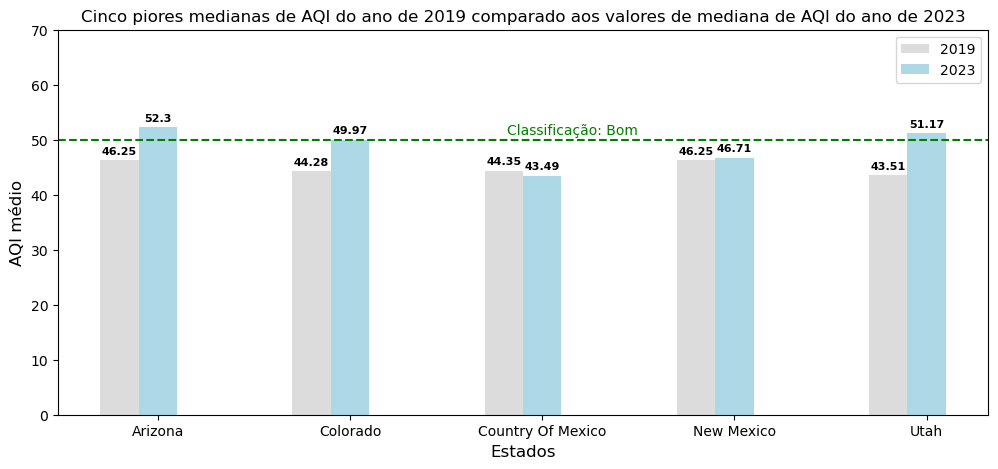

In [26]:
x=np.arange(5)

fig, ax = plt.subplots(figsize=(12,5))

# gráfico
m1 = ax.bar(x-0.2, median2019_5worst['AQI'], width=0.2, color=(220/255, 220/255, 220/255), alpha=1)
m2 = ax.bar(x, median2019_5worst_in2023['AQI'], width=0.2, color=(173/255, 216/255, 230/255), alpha=1)

ax.bar_label(m1, padding=3, fontsize=8, weight='bold')
ax.bar_label(m2, padding=3, fontsize=8, weight='bold')

# tamanho/limite do eixo y
ax.set_ylim(0, 70)

# rótulos, títulos e legenda
plt.xlabel('Estados', fontsize=12)
plt.ylabel('AQI médio', fontsize=12)
plt.title('Cinco piores medianas de AQI do ano de 2019 comparado aos valores de mediana de AQI do ano de 2023')
plt.xticks(x,median2019_5worst['State Name'])
plt.legend(['2019', '2023'], fontsize=10)

# adicionando linha de classificação de valores
plt.axhline(y=50, color='g', linestyle='--')
plt.text(len(median2019_5worst)/2, 51, f'Classificação: Bom', ha='right', color='g')

#### <font color='green'> __ANÁLISE__
    - Os estados do Arizona e Utah apresentaram mediana de AQI superior a 50, o que os classifica como Moderados na avaliação de qualidade do ar.
    - Apenas no estado da Cidade do Mexico ocorreu a diminuição da mediana do poluente Ozônio em 2023 comparado ao ano de 2019. Todos os demais estados apresentaram aumento no AQI médio em 2023 comparado ao ano de 2019.

#### Merge entre os dados dos 5 estados com pior mediana de AQI em 2019 e a mediana de AQI desses mesmos estados em 2023.

In [105]:
merge_5worst2019_2023 = pd.merge(median2019_5worst, median2019_5worst_in2023[['State Name', 'AQI']], on='State Name', how='left')

# adicionando uma nova coluna de comparação da diferença de valores entre os dois anos
merge_5worst2019_2023['Comparison'] = merge_5worst2019_2023['AQI_y'] - merge_5worst2019_2023['AQI_x']
merge_5worst2019_2023

,State Name,AQI_x,AQI_y,Comparison
0,Arizona,46.25,52.30,6.05
1,Colorado,44.28,49.97,5.69
2,Country Of Mexico,44.35,43.49,-0.86
3,New Mexico,46.25,46.71,0.46
4,Utah,43.51,51.17,7.66


#### Gráfico mostrando a diferença de valores de mediana de AQI em 2023 comparado aos valores de 2019 dos 5 estados selecionados anteriormente

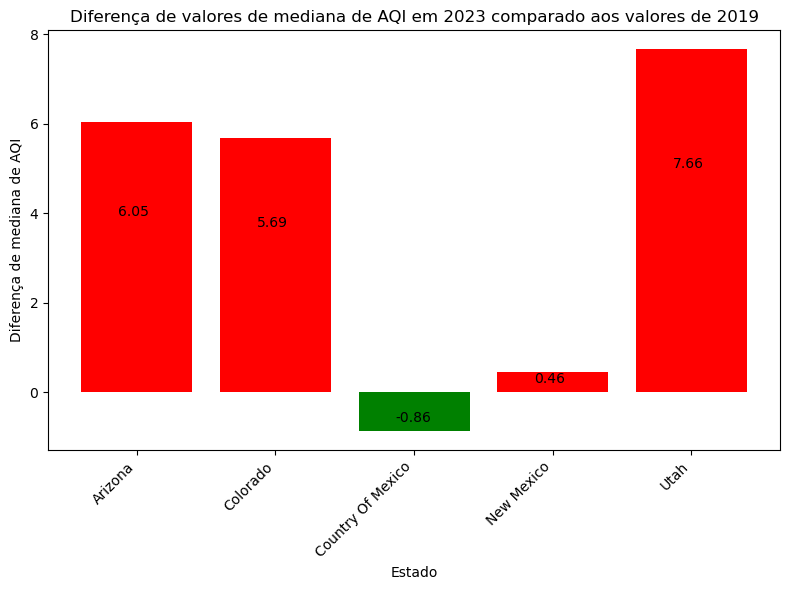

In [106]:
# lista de cores com base nos valores de 'Comparison'
cores = ['red' if comp > 0 else 'green' for comp in merge_5worst2019_2023['Comparison']]

# gráfico
plt.figure(figsize=(8, 6))
bars = plt.bar(merge_5worst2019_2023['State Name'], merge_5worst2019_2023['Comparison'], color=cores)

# rótulos
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/3.0, height/1.5, f'{height:.2f}', ha='left', va='center')

# título e rótulo dos eixos
plt.title('Diferença de valores de mediana de AQI em 2023 comparado aos valores de 2019')
plt.xlabel('Estado')
plt.ylabel('Diferença de mediana de AQI')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### <font color='green'> __ANÁLISE__
    - O estado de Utah teve a maior elevação na mediana de AQI em 2023 em relação aos valores de 2019, comparados aos demais estados selcionados

#### Correlação entre as colunas '1st Max Value AQI' e '1st Max Hour' para entender em qual horário estão sendo registrados os maiores valores de AQI do dia - 2019

In [107]:
# mediana de '1st Max Value AQI' para cada '1st Max Hour'
median_per_hour_2019 = ozone_2019.groupby('1st Max Hour')['1st Max Value AQI'].median()
median_per_hour_2019 = median_per_hour_2019.sort_index()

#### Gráfico exibindo a correlação entre os maiores valores de AQI registrados no dia e o horário do dia que esses valores foram capturados

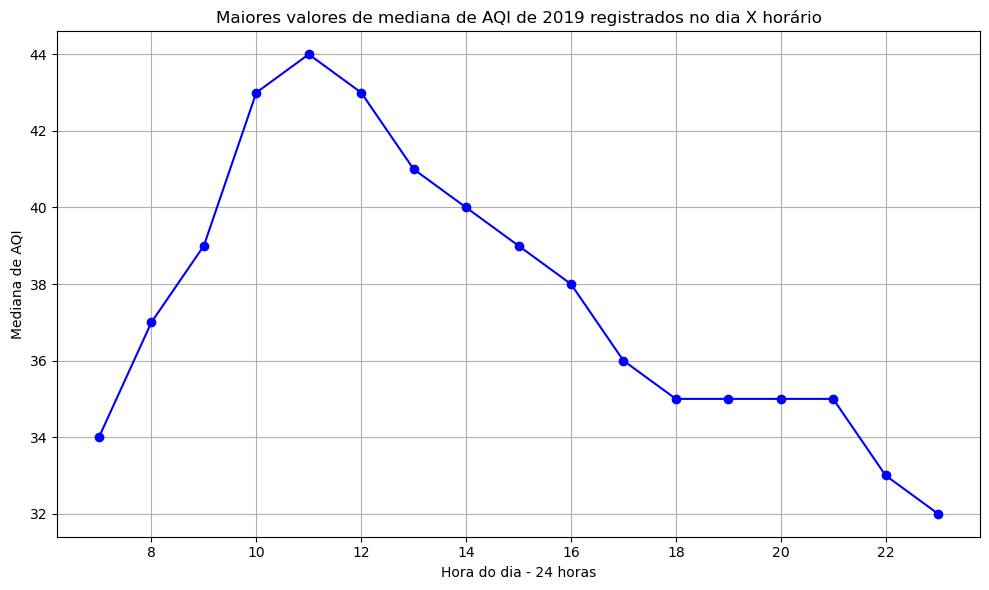

In [108]:
# gráfico
plt.figure(figsize=(10, 6))
plt.plot(median_per_hour_2019.index, median_per_hour_2019.values, marker='o', color='blue', linestyle='-')

# título e rótulos dos eixos
plt.title('Maiores valores de mediana de AQI de 2019 registrados no dia X horário')
plt.xlabel('Hora do dia - 24 horas')
plt.ylabel('Mediana de AQI')

plt.grid(True)
plt.tight_layout()
plt.show()

#### Correlação entre as colunas '1st Max Value AQI' e '1st Max Hour' para entender em qual horário estão sendo registrados os maiores valores de AQI do dia - 2023

In [109]:
# mediana de '1st Max Value AQI' para cada '1st Max Hour'
median_per_hour_2023 = ozone_2023.groupby('1st Max Hour')['1st Max Value AQI'].median()
median_per_hour_2023 = median_per_hour_2023.sort_index()

#### Gráfico exibindo a correlação entre os maiores valores de AQI registrados no dia e o horário do dia que esses valores foram capturados

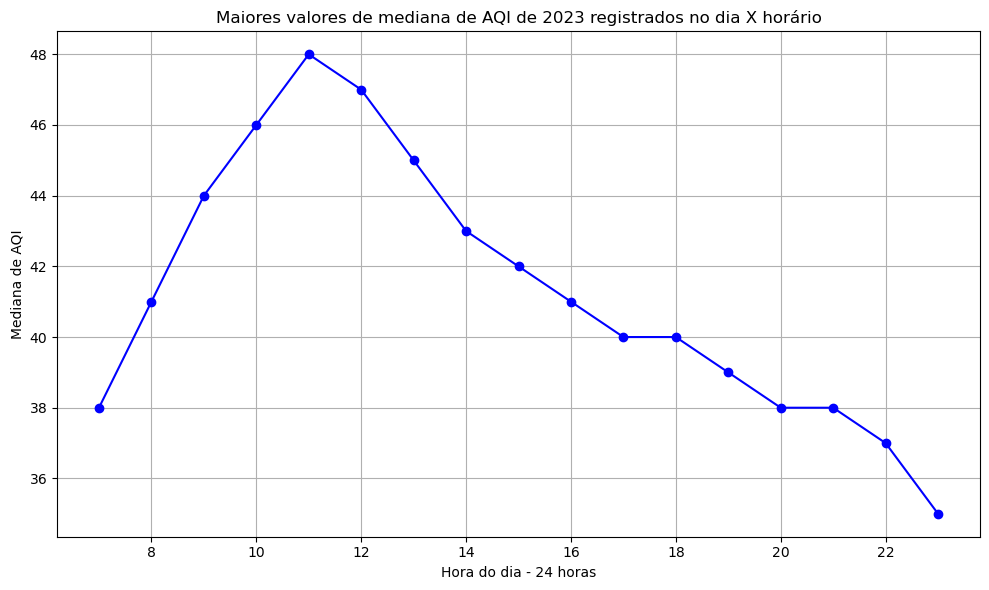

In [110]:
# gráfico
plt.figure(figsize=(10, 6))
plt.plot(median_per_hour_2023.index, median_per_hour_2023.values, marker='o', color='blue', linestyle='-')

# título e rótulos dos eixos
plt.title('Maiores valores de mediana de AQI de 2023 registrados no dia X horário')
plt.xlabel('Hora do dia - 24 horas')
plt.ylabel('Mediana de AQI')

plt.grid(True)
plt.tight_layout()
plt.show()

#### <font color='green'> __ANÁLISE__
    - É possível verificar que as 11h da manhã é horário em que os maiores valores de mediana de AQI foram registrados tanto em 2019 quanto em 2023

## <font color='green'> Análises dos dados: </font> Monóxido de Carbono

#### Checagem se meus dados da coluna AQI tem distribuição normal através do teste Kolmogorov-Smirnov pois tenho mais de 50 valores

In [111]:
# 2019
stat, p_value = kstest(co_2019['AQI'], 'norm')

# comparando o valor p com um nível de significância 0,05
if p_value > 0.05:
    print("A distribuição é normal")
else:
    print("A distribuição não é normal")

A distribuição não é normal


#### Histograma para visualizar a distribuição dos dados da coluna AQI no ano de 2019

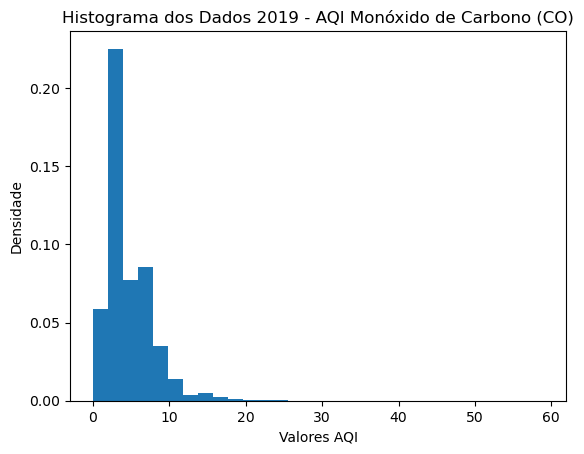

In [112]:
plt.hist(co_2019['AQI'], bins=30, density=True)
plt.title('Histograma dos Dados 2019 - AQI Monóxido de Carbono (CO)')
plt.xlabel('Valores AQI')
plt.ylabel('Densidade')
plt.show()

In [113]:
# 2019
stat, p_value = kstest(co_2023['AQI'], 'norm')

# comparando o valor p com um nível de significância 0,05
if p_value > 0.05:
    print("A distribuição é normal")
else:
    print("A distribuição não é normal")

A distribuição não é normal


#### Histograma para visualizar a distribuição dos dados da coluna AQI no ano de 2023

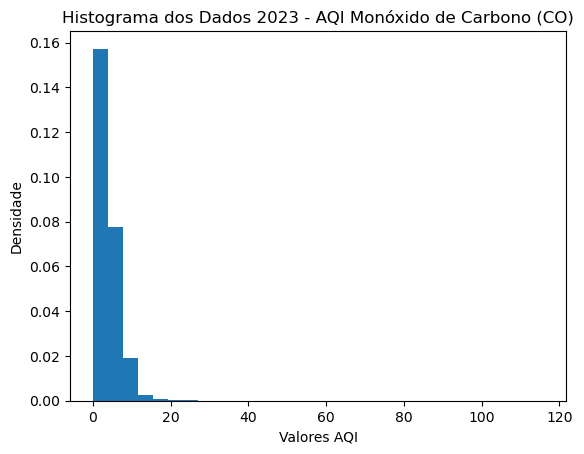

In [114]:
plt.hist(co_2023['AQI'], bins=30, density=True)
plt.title('Histograma dos Dados 2023 - AQI Monóxido de Carbono (CO)')
plt.xlabel('Valores AQI')
plt.ylabel('Densidade')
plt.show()

#### Mediana de AQI por mês

In [115]:
# 2019
median2019 = co_2019.pivot_table(index='Month', values='AQI', aggfunc='mean').round(1).reset_index()
# 2023
median2023 = co_2023.pivot_table(index='Month', values='AQI', aggfunc='mean').round(1).reset_index()

# organização do maior valor para o menor
median2019 = median2019.sort_values(by='Month')
median2023 = median2023.sort_values(by='Month')

# definição da nova linha que será adicionada
new_line = {'Month': 'Dec', 'AQI': 0}

# adição da nova linha ao dataframe median2023
median2023 = median2023.append(new_line, ignore_index=True)

C:\Users\je_gr\AppData\Local\Temp\ipykernel_10328\3924241666.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median2023 = median2023.append(new_line, ignore_index=True)


#### Gráfico com comparação das medianas de cada mês de 2019 e 2023

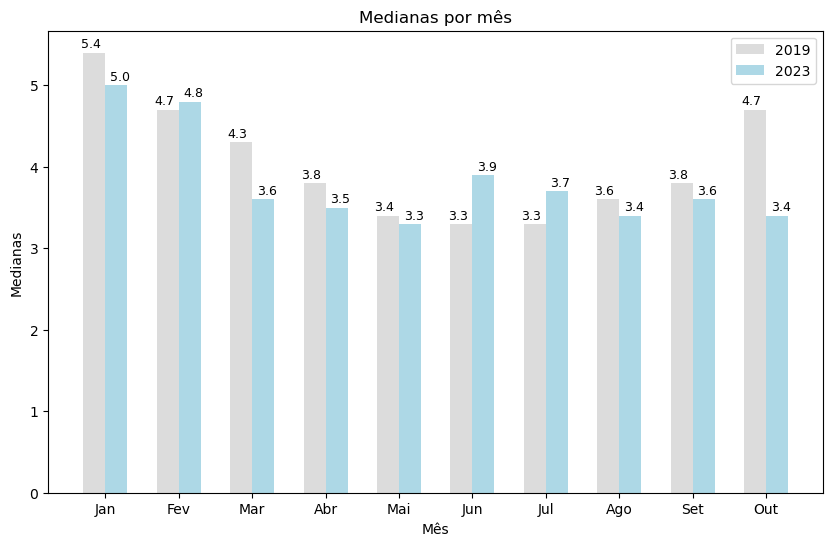

In [116]:
# combinação dos dataframes median2029 e median2023 em um único dataframe
df_combined = pd.merge(median2019, median2023, on='Month')

# índices para os meses
indixes = np.arange(len(df_combined))

bar_width = 0.30
plt.figure(figsize=(10, 6))

# gráfico
bars1 = plt.bar(indixes - bar_width/2, df_combined['AQI_x'], bar_width, label='2019', color=(220/255, 220/255, 220/255))
bars2 = plt.bar(indixes + bar_width/2, df_combined['AQI_y'], bar_width, label='2023', color=(173/255, 216/255, 230/255))

# rótulos, títulos e legenda
plt.xlabel('Mês')
plt.ylabel('Medianas')
plt.title('Medianas por mês')
plt.xticks(indixes, df_combined['Month'])
plt.legend()

# adicionando rótulos
for bar1, bar2 in zip(bars1, bars2):
    plt.text(bar1.get_x() + bar1.get_width()/2 - 0.05, bar1.get_height() + 0.06, str(bar1.get_height()), ha='center', fontsize=9)
    plt.text(bar2.get_x() + bar2.get_width()/2 + 0.05, bar2.get_height() +0.06, str(bar2.get_height()), ha='center', fontsize=9)

plt.show()

#### <font color='green'> __ANÁLISE__
    - Para o ano de 2019, os meses de janeiro, fevereiro e outubro apresentam as maiores medianas na presença do poluente
    - Para o ano de 2023, os meses de janeiro e fevereiro apresentam as maiores medianas na presença do poluente
    - Apenas nos meses de fevereiro, junho e julho a mediana do poluente foi maior em 2023 comparado ao ano de 2019. Nos demais meses o poluente apresentou baixa comoparado ao ano de 2019.
    
    
    Obs.: Não existem registros nos meses de Novembro e Dezembro para 2023

## <font color='green'> Análises dos dados: </font> todos os poluentes

In [117]:
# verificando qual cidade apresenta o maior valor de AQI do poluente Ozônio em 2023
ozone_maxAQI_2023 = ozone_2023[['State Name', 'City Name', 'AQI', 'Month']].copy()
ozone_maxAQI_2023.sort_values(by='AQI', ascending=False)

,State Name,City Name,AQI,Month
38902,Colorado,Denver,217,Jul
191603,Utah,Not in a city,215,Fev
194795,Utah,Not in a city,215,Fev
191331,Utah,Roosevelt,213,Fev
191059,Utah,Roosevelt,207,Fev
...,...,...,...,...
12478,Arkansas,North Little Rock,0,Jan
131398,New Mexico,Shiprock,0,Jan
131397,New Mexico,Shiprock,0,Jan
131396,New Mexico,Shiprock,0,Jan


In [118]:
# salvando apenas os dados correspondentes a cidade de Denver em 2023
ozone_maxAQI_2023_denver = ozone_2023.loc[ozone_maxAQI_2023['City Name'] == 'Denver']
co_maxAQI_2023_denver = co_2023.loc[co_2023['City Name'] == 'Denver']
so2_maxAQI_2023_denver = so2_2023.loc[so2_2023['City Name'] == 'Denver']
no2_maxAQI_2023_denver = no2_2023.loc[no2_2023['City Name'] == 'Denver']

#### Quartis dos dados de AQI do poluente dióxido de nitrogênio na cidade de Denver

In [119]:
quartiles = np.percentile(no2_maxAQI_2023_denver['AQI'], [25, 50, 75])
quartiles

array([21., 31., 42.])

#### Gráfico de quartis do AQI do poluente dióxido de nitrogênio na cidade de Denver

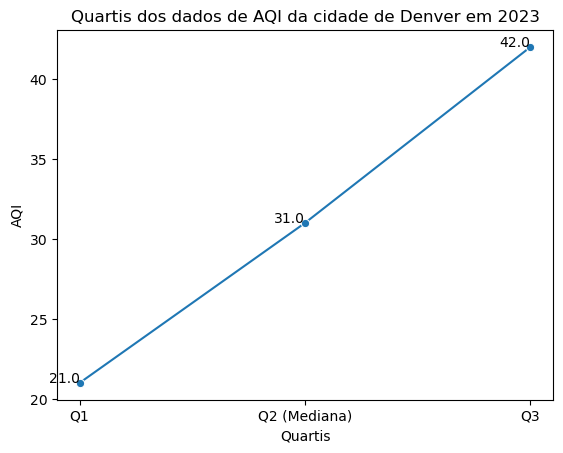

In [120]:
df_quartiles = pd.DataFrame({'Quartis': ['Q1', 'Q2 (Mediana)', 'Q3'], 'AQI': quartiles})

# gráfico
sns.lineplot(data=df_quartiles, x='Quartis', y='AQI', marker='o')

# adicionando rótulos
for index, row in df_quartiles.iterrows():
    plt.text(row['Quartis'], row['AQI'], str(row['AQI']), ha='right')

# título do gráfico
plt.title('Quartis dos dados de AQI da cidade de Denver em 2023')

plt.show()

#### Cálculo de mediana de todos os poluentes no ano de 2023

In [121]:
ozone_median2023 = ozone_2023.pivot_table(index='Month', values='AQI', aggfunc='median').round(1).reset_index()
co_median2023 = co_2023.pivot_table(index='Month', values='AQI', aggfunc='median').round(1).reset_index()
so2_median2023 = so2_2023.pivot_table(index='Month', values='AQI', aggfunc='median').round(1).reset_index()
no2_median2023 = no2_2023.pivot_table(index='Month', values='AQI', aggfunc='median').round(1).reset_index()

#### Exclusão dos dados do mês de Novembro no dataframe do poluente de Monóxido de Carbono

* Essa exclusão foi é feita para igualar os meses em todos os dataframes. </br>
* Todos os dataframes possuem dados de Janeiro a Setembro. O único que possui informações extras é o dataframe relativo ao poluente CO e apenas no mês de Novembro.

In [122]:
month_to_delete = ['Nov', 'Out']
lines_to_delete = co_median2023[co_median2023.apply(lambda row: any(row.str.contains('|'.join(month_to_delete))), axis=1)].index

# exclusão das linhas com informação em Novembro
co_median2023 = co_median2023.drop(lines_to_delete)

#### Gráfico comparando o valor da mediana de AQI de todos os poluentes de Janeiro a Setembro de 2023 em todos os estados

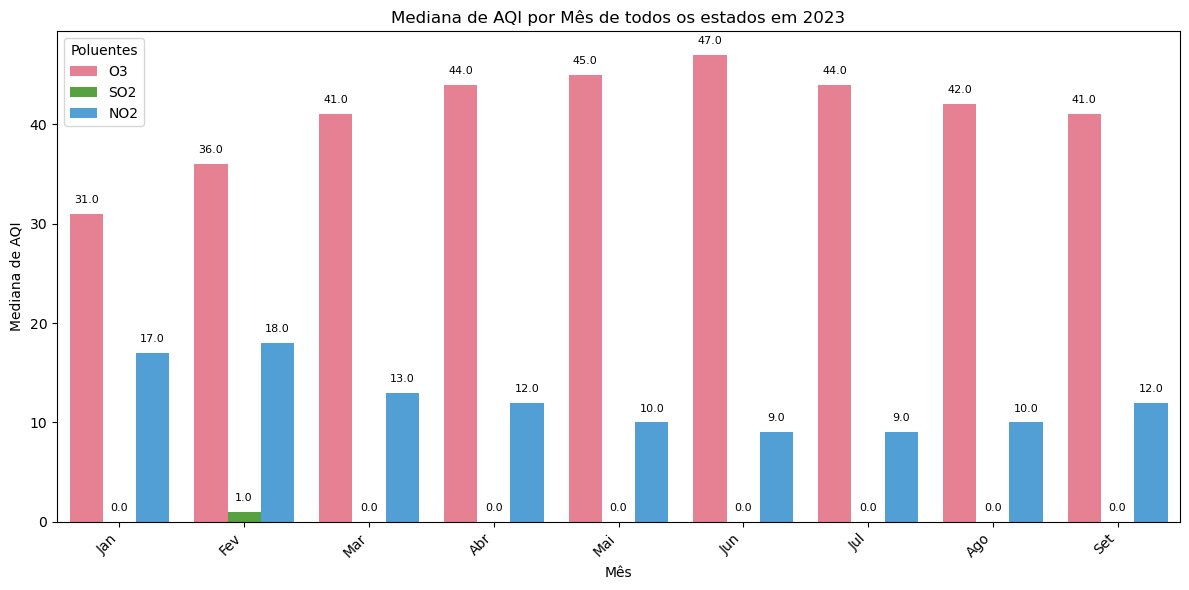

In [123]:
# concatenar todas as bases das medianas de AQI de todos os poluentes
df_median_concat = pd.concat([ozone_median2023, co_median2023, so2_median2023, no2_median2023], keys=['O3', 'CO', 'SO2', 'NO2'])

# resetar o índice para conseguir acessar 'State Name' como uma coluna
df_median_concat = df_median_concat.reset_index(level=0).rename(columns={'level_0': 'DF'})

# convertendo a coluna categórica para texto pois estava lendo informações vaias dos meses de Nov e Dez
df_median_concat['Month'] = df_median_concat['Month'].astype(str)

# gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=df_median_concat, x='Month', y='AQI', hue='DF', palette='husl')

# rótulos, títulos e legenda
plt.title('Mediana de AQI por Mês de todos os estados em 2023')
plt.xlabel('Mês')
plt.ylabel('Mediana de AQI')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Poluentes')
plt.tight_layout()

# adicionando rótulos
for p in plt.gca().patches:
    plt.gca().annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.show()

#### <font color='green'> __ANÁLISE__
    - Ozonio: é possível perceber que o poluente teve um aumento no decorrer do ano, tendo seu ápice em Junho. Mesmo após uma baixa a partir de julho, o mesmo não retornou ao valor inicial do Janeiro.
    - CO e SO2: apresentaram diminuição na mediana de AQI no decorrer do ano em relação a média de AQI de Janeiro.
    - NO2: apresentou diminuição da mediana de AQI no decorrer do ano a partir do mês de março, comparado aos valores inicias de janeiro e fevereiro

## <font color='green'> Análises dos dados: </font> mediana de AQI de 2023 na cidade de Denver

In [124]:
ozone_median_2023_denver = ozone_maxAQI_2023_denver.pivot_table(index='Month', values='AQI', aggfunc='median').round(1).reset_index()
co_median_2023_denver = co_maxAQI_2023_denver.pivot_table(index='Month', values='AQI', aggfunc='median').round(1).reset_index()
so2_median_2023_denver = so2_maxAQI_2023_denver.pivot_table(index='Month', values='AQI', aggfunc='median').round(1).reset_index()
no2_median_2023_denver = no2_maxAQI_2023_denver.pivot_table(index='Month', values='AQI', aggfunc='median').round(1).reset_index()

#### Exclusão dos dados do mês de Setembro no dataframe do poluente de Monóxido de Carbono

* Essa exclusão foi é feita para igualar os meses em todos os dataframes. </br>
* Todos os dataframes possuem dados de Janeiro a Agosto. O único que possui informações extras é o dataframe relativo ao poluente CO e apenas no mês de Setembro.

In [125]:
co_median_2023_denver = co_median_2023_denver[co_median_2023_denver['Month'] != 'Set']

#### Gráfico comparando o valor do mediana de AQI de todos os poluentes de Janeiro a Agosto de 2023 na cidade de Denver

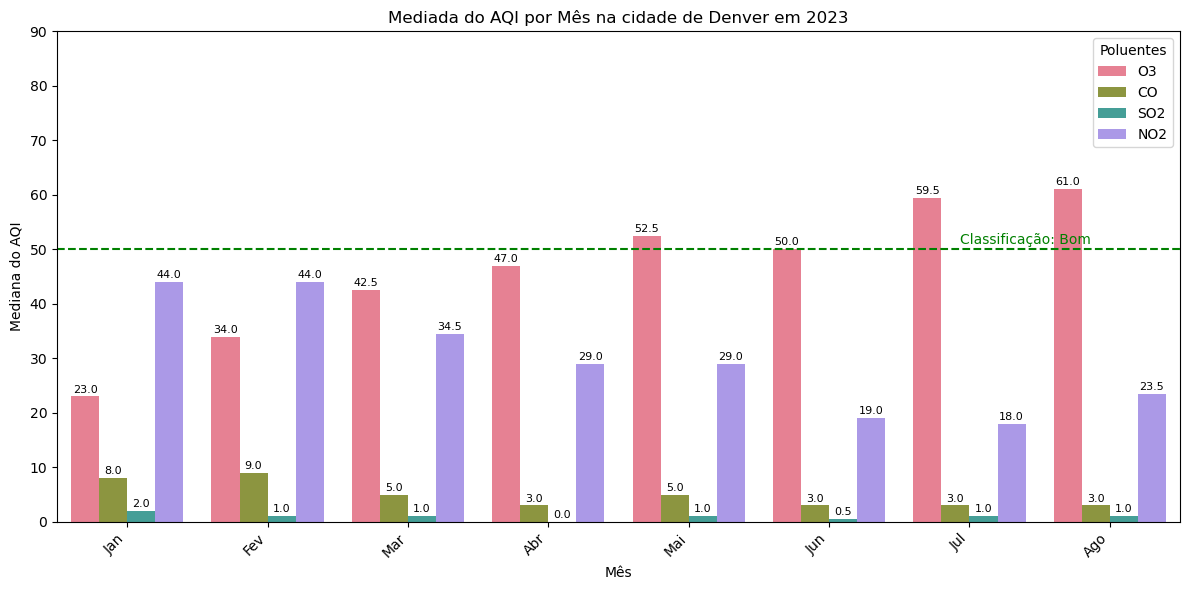

In [126]:
# concatenar todas as bases das médias de AQI de todos os poluentes
df_median_concat_denver = pd.concat([ozone_median_2023_denver, co_median_2023_denver, so2_median_2023_denver, no2_median_2023_denver], keys=['O3', 'CO', 'SO2', 'NO2'])

# resetar o índice para conseguir acessar 'State Name' como uma coluna
df_median_concat_denver = df_median_concat_denver.reset_index(level=0).rename(columns={'level_0': 'DF'})

# convertendo a coluna categórica para texto pois estava lendo informações vaias dos meses de Nov e Dez
df_median_concat_denver['Month'] = df_median_concat_denver['Month'].astype(str)

# gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=df_median_concat_denver, x='Month', y='AQI', hue='DF', palette='husl')

plt.ylim(0, 90)

# rótulos, títulos e legenda
plt.title('Mediada do AQI por Mês na cidade de Denver em 2023')
plt.xlabel('Mês')
plt.ylabel('Mediana do AQI')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Poluentes')
plt.tight_layout()


# adicionando linha de classificação de valores
plt.axhline(y=50, color='g', linestyle='--')
plt.text(len(df_median_concat_denver)/5, 51, f'Classificação: Bom', ha='center', color='g')

# adicionando rótulos
for p in plt.gca().patches:
    plt.gca().annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

plt.show()

#### <font color='green'> __ANÁLISE__
    - Os poluentes SO2 e CO tiveram queda e se manteram baixas em suas medianas de AQI no decorrer dos meses.
    - Ozonio: a mediana de AQI desse poluente teve aumento expressivo (quase triplicou) de janeiro a agosto.
    - NO2: ocorreu queda desse poluente no decorrer do ano, diminuindo em, praticamente, metade o valor a mediana de AQI de agosto comparada a janeiro .